<h1 style="text-align:center">Exploratory Data Analysis</h1>

#### Objective:  What are the main characteristics which have the most impact on the car price?

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Import Dataset

In [2]:
path = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv"
df = pd.read_csv(path)
df.head(5)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


## Analyzing Individual Feature Pattern using Visulaization

### 1. Continuous Numerical Variable

(0, 13211.11891304897)

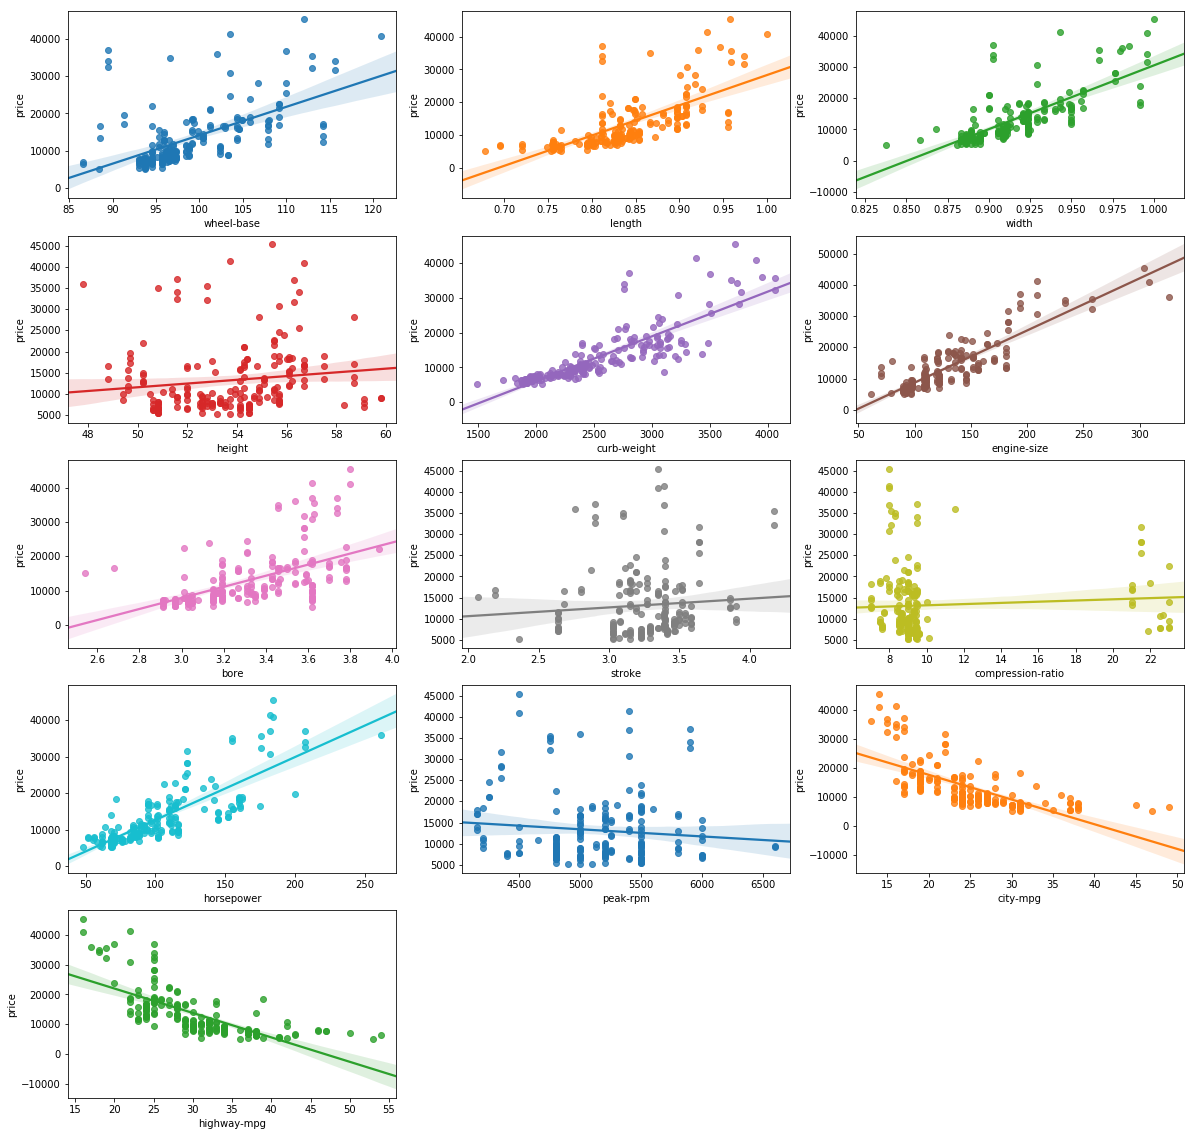

In [3]:
fig, axes = plt.subplots(5, 3,figsize=(20,20))
sns.regplot(x="wheel-base",y="price",data=df, ax=axes[0,0])
sns.regplot(x="length",y="price",data=df, ax=axes[0,1])
sns.regplot(x="width",y="price",data=df, ax=axes[0,2])
sns.regplot(x="height",y="price",data=df, ax=axes[1,0])
sns.regplot(x="curb-weight",y="price",data=df, ax=axes[1,1])
sns.regplot(x="engine-size",y="price",data=df, ax=axes[1,2])
sns.regplot(x="bore",y="price",data=df, ax=axes[2,0])
sns.regplot(x="stroke",y="price",data=df, ax=axes[2,1])
sns.regplot(x="compression-ratio",y="price",data=df, ax=axes[2,2])
sns.regplot(x="horsepower",y="price",data=df, ax=axes[3,0])
sns.regplot(x="peak-rpm",y="price",data=df, ax=axes[3,1])
sns.regplot(x="city-mpg",y="price",data=df, ax=axes[3,2])
sns.regplot(x="highway-mpg",y="price",data=df, ax=axes[4,0])
axes[4,1].axis("off")
axes[4,2].axis("off")
plt.ylim(0,)

From the above result we can conclude that :

<b>Positive relationship:</b>
- Wheel-base
- Length
- Width
- Curb weight
- Engine size
- Bore
- Horse power

<b>Negative Relationship:</b>
- Highway mpg
- City mpg


<b>No Relationship:</b>
- Peak rpm
- Stroke
- Compression ratio
- Height

### 2. Categorical Variable

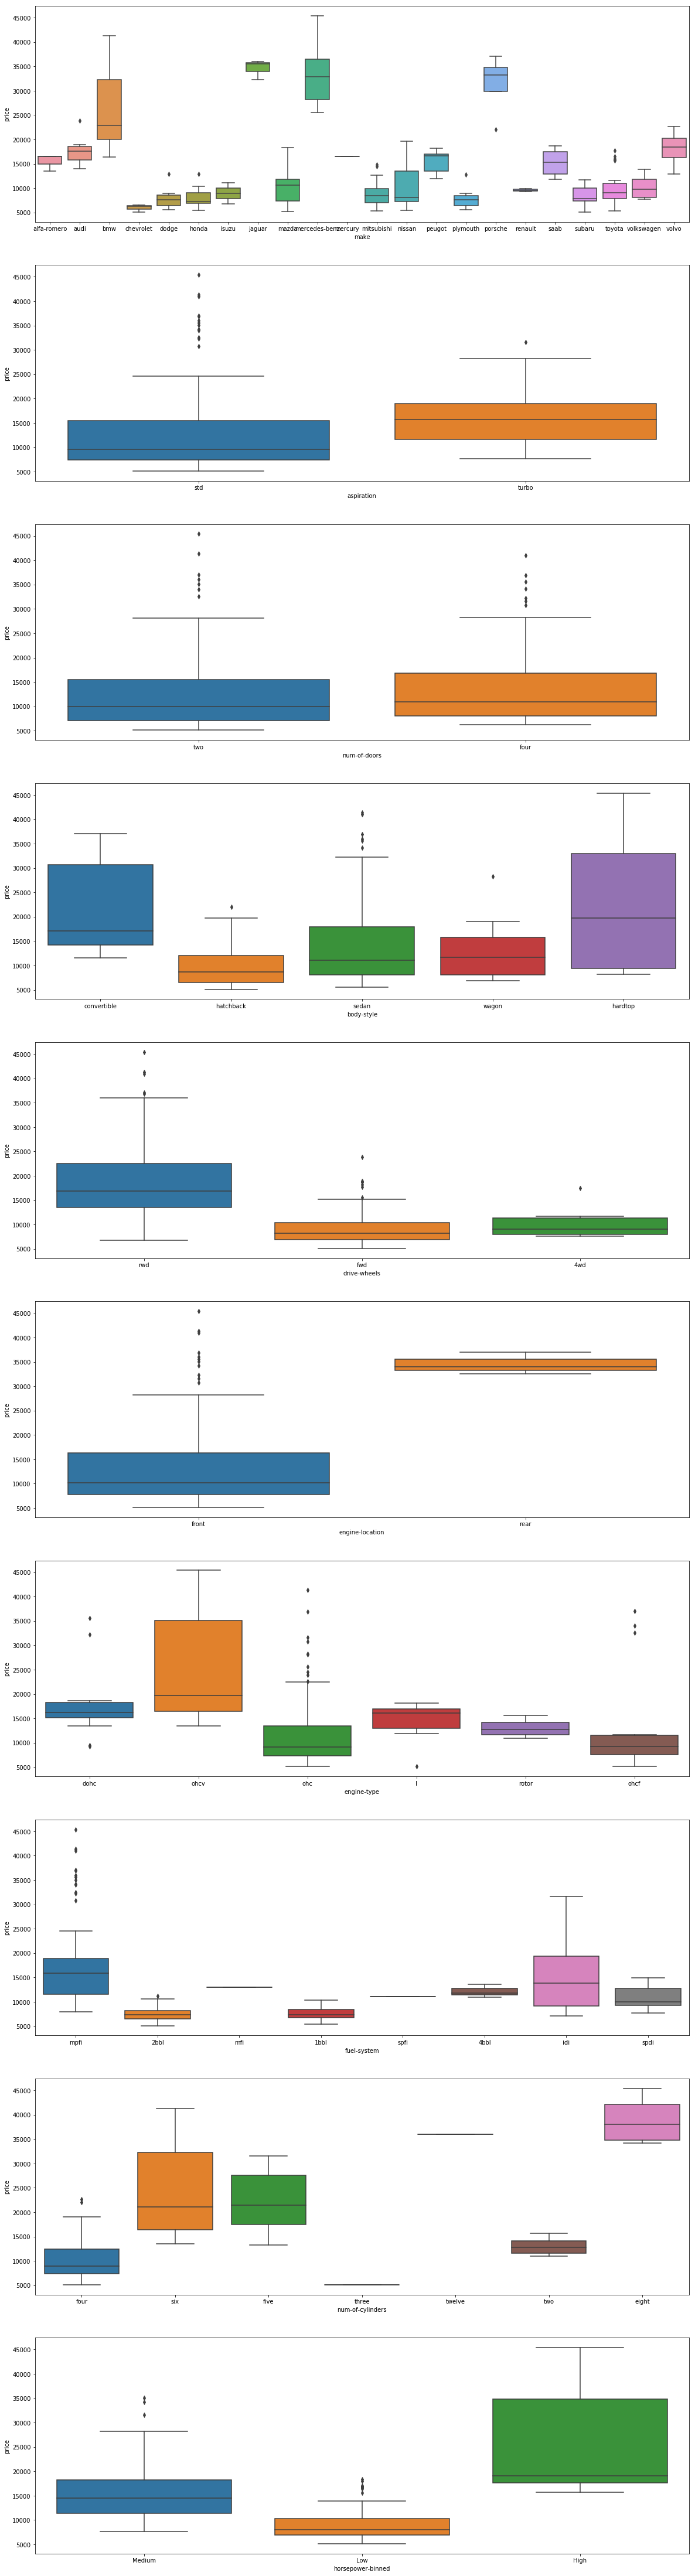

In [4]:
fig, ax = plt.subplots(10,1,figsize=(20,80))
sns.boxplot(x="make",y="price",data=df,ax=ax[0])
sns.boxplot(x="aspiration",y="price",data=df,ax=ax[1])
sns.boxplot(x="num-of-doors",y="price",data=df,ax=ax[2])
sns.boxplot(x="body-style",y="price",data=df,ax=ax[3])
sns.boxplot(x="drive-wheels",y="price",data=df,ax=ax[4])
sns.boxplot(x="engine-location",y="price",data=df,ax=ax[5])
sns.boxplot(x="engine-type",y="price",data=df,ax=ax[6])
sns.boxplot(x="fuel-system",y="price",data=df,ax=ax[7])
sns.boxplot(x="num-of-cylinders",y="price",data=df,ax=ax[8])
sns.boxplot(x="horsepower-binned",y="price",data=df,ax=ax[9])

Conclusion, the following variables might be a good potential variable as a predictor of price:
- Drive-wheels
- Engine-location
    

## Correlation and Causation

### Pearson Correlation

In [5]:
from scipy import stats

In [6]:
#Wheel-base VS Price
pearson_coef, p_value = stats.pearsonr(df["wheel-base"],df["price"])
print("Pearson Co-effice=ient : ",pearson_coef," and P-value : ",p_value)

Pearson Co-effice=ient :  0.5846418222655081  and P-value :  8.076488270732955e-20


In [7]:
#Length VS Price
pearson_coef, p_value = stats.pearsonr(df["length"],df["price"])
print("Pearson Co-effice=ient : ",pearson_coef," and P-value : ",p_value)

Pearson Co-effice=ient :  0.690628380448364  and P-value :  8.016477466159053e-30


In [8]:
#Width VS Price
pearson_coef, p_value = stats.pearsonr(df["width"],df["price"])
print("Pearson Co-effice=ient : ",pearson_coef," and P-value : ",p_value)

Pearson Co-effice=ient :  0.7512653440522674  and P-value :  9.200335510481426e-38


In [9]:
#Curb-weight VS Price
pearson_coef, p_value = stats.pearsonr(df["curb-weight"],df["price"])
print("Pearson Co-effice=ient : ",pearson_coef," and P-value : ",p_value)

Pearson Co-effice=ient :  0.8344145257702846  and P-value :  2.1895772388936997e-53


In [10]:
#Engine-size VS Price
pearson_coef, p_value = stats.pearsonr(df["engine-size"],df["price"])
print("Pearson Co-effice=ient : ",pearson_coef," and P-value : ",p_value)

Pearson Co-effice=ient :  0.8723351674455185  and P-value :  9.265491622197996e-64


In [11]:
#Bore VS Price
pearson_coef, p_value = stats.pearsonr(df["bore"],df["price"])
print("Pearson Co-effice=ient : ",pearson_coef," and P-value : ",p_value)

Pearson Co-effice=ient :  0.5431553832626602  and P-value :  8.049189483935364e-17


In [12]:
#Horsepower VS Price
pearson_coef, p_value = stats.pearsonr(df["horsepower"],df["price"])
print("Pearson Co-effice=ient : ",pearson_coef," and P-value : ",p_value)

Pearson Co-effice=ient :  0.8095745670036559  and P-value :  6.36905742825998e-48


In [13]:
#Highway-mpg VS Price
pearson_coef, p_value = stats.pearsonr(df["highway-mpg"],df["price"])
print("Pearson Co-effice=ient : ",pearson_coef," and P-value : ",p_value)

Pearson Co-effice=ient :  -0.7046922650589529  and P-value :  1.7495471144476807e-31


In [14]:
#City-mpg VS Price
pearson_coef, p_value = stats.pearsonr(df["city-mpg"],df["price"])
print("Pearson Co-effice=ient : ",pearson_coef," and P-value : ",p_value)

Pearson Co-effice=ient :  -0.6865710067844677  and P-value :  2.3211320655676368e-29


From the above result we can conclude that :
- Wheel-base P-value is statistically significant but linear relationship is moderate
- Length P-value is statistically significant but linear relationship is moderate 
- Width P-value is statistically significant but linear relationship is strong 
- Curb-weight P-value is statistically significant but linear relationship is strong 
- Engine-size P-value is statistically significant but linear relationship is strong 
- Bore P-value is statistically significant but linear relationship is moderate 
- Horsepower P-value is statistically significant but linear relationship is strong 
- Highway-mpg P-value is statistically significant but linear relationship is strong and negatively related 
- City-mpg P-value is statistically significant but linear relationship is moderate and negatively related

## ANOVA

In [15]:
df_grp = df[["drive-wheels","price"]]
df_grp = df_grp.groupby(['drive-wheels'])
df_grp.head()

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
2,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
6,fwd,17710.0
7,fwd,18920.0
8,fwd,23875.0
9,rwd,16430.0


In [22]:
#ANOVA for drive-wheels
f_val, p_val = stats.f_oneway(df_grp.get_group("fwd")["price"],df_grp.get_group("rwd")["price"],df_grp.get_group("4wd")["price"])
print("ANOVA : F-value : ",f_val," and P-value: ",p_val)

ANOVA : F-value :  67.95406500780399  and P-value:  3.3945443577151245e-23


This is a great result because F-value shows large value which means there is a strong correlation

In [17]:
df["engine-location"].unique()

array(['front', 'rear'], dtype=object)

In [19]:
grp_engineloc = df[["engine-location","price"]]
grp_engineloc = grp_engineloc.groupby(["engine-location"])
grp_engineloc.head()

,engine-location,price
0,front,13495.0
1,front,16500.0
2,front,16500.0
3,front,13950.0
4,front,17450.0
123,rear,32528.0
124,rear,34028.0
125,rear,37028.0


In [21]:
#ANOVA for engine-location
f_val, p_val = stats.f_oneway(grp_engineloc.get_group("front")["price"],grp_engineloc.get_group("rear")["price"])
print("ANOVA : F-value : ",f_val," and P-value: ",p_val)

ANOVA : F-value :  24.495550318865693  and P-value:  1.583490019777699e-06


This is a great result because F-value shows large value which means there is a strong correlation

## Conclusion (Important Variables) :

#### Numerical Variables :

- Wheel-base 
- Length 
- Width 
- Curb-weight
- Engine-size
- Bore
- Horsepower
- Highway-mpg
- City-mpg

#### Categorical Variables :

- Drive-wheels
- Engine-location